<a href="https://colab.research.google.com/github/Rahullotia99/Regression-Research/blob/main/Research_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Last updated: 15 Feb 2023

# 👋 PyCaret Regression Tutorial

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

Compared with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with a few lines only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more.

The design and simplicity of PyCaret are inspired by the emerging role of citizen data scientists, a term first used by Gartner. Citizen Data Scientists are power users who can perform both simple and moderately sophisticated analytical tasks that would previously have required more technical expertise.


# 💻 Installation

PyCaret is tested and supported on the following 64-bit systems:
- Python 3.7 – 3.10
- Python 3.9 for Ubuntu only
- Ubuntu 16.04 or later
- Windows 7 or later

You can install PyCaret with Python's pip package manager:

`pip install pycaret`

PyCaret's default installation will not install all the extra dependencies automatically. For that you will have to install the full version:

`pip install pycaret[full]`

or depending on your use-case you may install one of the following variant:

- `pip install pycaret[analysis]`
- `pip install pycaret[models]`
- `pip install pycaret[tuner]`
- `pip install pycaret[mlops]`
- `pip install pycaret[parallel]`
- `pip install pycaret[test]`

In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.6 MB/s eta 0:00:00
   ━━━━

In [ ]:
# check installed version (must be >3.0)
import pycaret
pycaret.__version__

'3.3.2'

# 🚀 Quick start

PyCaret's Regression Module is a supervised machine learning module that is used for estimating the relationships between a dependent variable (often called the outcome variable, or target) and one or more independent variables (often called features, predictors, or covariates).

The objective of regression is to predict continuous values such as predicting sales amount, predicting quantity, predicting temperature, etc. Regression module provides several pre-processing features to preprocess the data for modeling through the setup function.

PyCaret's regression module has many preprocessing capabilities and it coems with over 25 ready-to-use algorithms and several plots to analyze the performance of trained models.

A typical workflow in PyCaret Regression module consist of the following 5 steps in this order:

### **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**
<br/>

In [ ]:
!unzip -q wine+quality.zip

In [ ]:
### load sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('winequality-red')

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


## Setup
The `setup` function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [ ]:
!pip install chardet
import pandas as pd
import chardet
from pycaret.regression import *

# 1. Reload the data to ensure it's fresh
data = pd.read_csv('winequality-red.csv', sep=';')

# 2. Detect encoding if needed
with open('winequality-red.csv', 'rb') as f:
    result = chardet.detect(f.read())
print(f"Detected encoding: {result['encoding']}")
data = pd.read_csv('winequality-red.csv', sep=';', encoding=result['encoding'])

# 3. Print data types and unique values of columns
for col in data.columns:
    print(f"Column: {col}, Type: {data[col].dtype}, Unique Values: {data[col].unique()[:5]}...")

# 4. Clean column names
data.columns = data.columns.str.strip().str.replace(' ', '_')

# 5. Verify the target column
print(f"'alcohol' in data.columns: {'alcohol' in data.columns}")

# 6. Proceed with setup
s = setup(data, target='alcohol', session_id=123)

Detected encoding: ascii
Column: fixed acidity, Type: float64, Unique Values: [ 7.4  7.8 11.2  7.9  7.3]...
Column: volatile acidity, Type: float64, Unique Values: [0.7  0.88 0.76 0.28 0.66]...
Column: citric acid, Type: float64, Unique Values: [0.   0.04 0.56 0.06 0.02]...
Column: residual sugar, Type: float64, Unique Values: [1.9 2.6 2.3 1.8 1.6]...
Column: chlorides, Type: float64, Unique Values: [0.076 0.098 0.092 0.075 0.069]...
Column: free sulfur dioxide, Type: float64, Unique Values: [11. 25. 15. 17. 13.]...
Column: total sulfur dioxide, Type: float64, Unique Values: [34. 67. 54. 60. 40.]...
Column: density, Type: float64, Unique Values: [0.9978 0.9968 0.997  0.998  0.9964]...
Column: pH, Type: float64, Unique Values: [3.51 3.2  3.26 3.16 3.3 ]...
Column: sulphates, Type: float64, Unique Values: [0.56 0.68 0.65 0.58 0.46]...
Column: alcohol, Type: float64, Unique Values: [ 9.4  9.8 10.   9.5 10.5]...
Column: quality, Type: int64, Unique Values: [5 6 7 4 8]...
'alcohol' in data.

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(1599, 12)"
4,Transformed data shape,"(1599, 12)"
5,Transformed train set shape,"(1119, 12)"
6,Transformed test set shape,"(480, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


Once the setup has been successfully executed it shows the information grid containing experiment level information.

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Target type:**  Binary, Multiclass, or Regression. The Target type is automatically detected. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [ ]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [ ]:
# check the type of exp
type(exp)

pycaret.regression.oop.RegressionExperiment

In [ ]:
# init setup on exp
exp.setup(data, target = 'alcohol', session_id = 123)

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(1599, 12)"
4,Transformed data shape,"(1599, 12)"
5,Transformed train set shape,"(1119, 12)"
6,Transformed test set shape,"(480, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


You can use any of the two method i.e. Functional or OOP and even switch back and forth between two set of API's. The choice of method will not impact the results and has been tested for consistency.
___

## Compare Models

The `compare_models` function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.3321,0.2393,0.4873,0.7818,0.0415,0.0316,2.2440
lightgbm,Light Gradient Boosting Machine,0.3502,0.2694,0.5169,0.7527,0.0440,0.0333,0.3590
xgboost,Extreme Gradient Boosting,0.3435,0.2771,0.5247,0.7448,0.0447,0.0325,0.2810
et,Extra Trees Regressor,0.3445,0.2801,0.5276,0.7440,0.0450,0.0327,0.3520
rf,Random Forest Regressor,0.3759,0.2946,0.5408,0.7301,0.0462,0.0358,0.9400
gbr,Gradient Boosting Regressor,0.3995,0.2965,0.5430,0.7294,0.0464,0.0381,0.4000
lr,Linear Regression,0.4532,0.3609,0.5971,0.6691,0.0517,0.0434,0.8090
lar,Least Angle Regression,0.4532,0.3609,0.5971,0.6691,0.0517,0.0434,0.0260
ada,AdaBoost Regressor,0.5605,0.4679,0.6825,0.5726,0.0591,0.0543,0.1640
dt,Decision Tree Regressor,0.4763,0.5556,0.7433,0.4873,0.0635,0.0450,0.0300


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
# compare models using OOP
exp.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.3321,0.2393,0.4873,0.7818,0.0415,0.0316,2.8590
lightgbm,Light Gradient Boosting Machine,0.3502,0.2694,0.5169,0.7527,0.0440,0.0333,0.2380
xgboost,Extreme Gradient Boosting,0.3435,0.2771,0.5247,0.7448,0.0447,0.0325,0.1580
et,Extra Trees Regressor,0.3445,0.2801,0.5276,0.7440,0.0450,0.0327,0.6930
rf,Random Forest Regressor,0.3759,0.2946,0.5408,0.7301,0.0462,0.0358,1.0300
gbr,Gradient Boosting Regressor,0.3995,0.2965,0.5430,0.7294,0.0464,0.0381,0.2630
lr,Linear Regression,0.4532,0.3609,0.5971,0.6691,0.0517,0.0434,0.0260
lar,Least Angle Regression,0.4532,0.3609,0.5971,0.6691,0.0517,0.0434,0.0280
ada,AdaBoost Regressor,0.5605,0.4679,0.6825,0.5726,0.0591,0.0543,0.2820
dt,Decision Tree Regressor,0.4763,0.5556,0.7433,0.4873,0.0635,0.0450,0.0330


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
!pip install pycaret[full]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 52.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.6 MB/s eta 0:00:00
   ━━━━━━

In [ ]:
best = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2868,0.1678,0.4096,0.8057,0.0367,0.0283
1,0.3843,0.3046,0.5519,0.7041,0.0474,0.0364
2,0.3474,0.2310,0.4806,0.8065,0.0420,0.0335
3,0.3582,0.2663,0.5160,0.7975,0.0443,0.0343
4,0.2916,0.1924,0.4386,0.7837,0.0371,0.0276
5,0.3278,0.2523,0.5023,0.7893,0.0411,0.0301
6,0.3042,0.2934,0.5417,0.7346,0.0432,0.0280
7,0.3499,0.2352,0.4850,0.8103,0.0413,0.0332
8,0.3093,0.2012,0.4486,0.7786,0.0388,0.0297


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Notice that the output between functional and OOP API is consistent. Rest of the functions in this notebook will only be shown using functional API only.

___

## Analyze Model

The `plot_model` function is used to analyze the performance of a trained model on the test set. It may require re-training the model in certain cases.

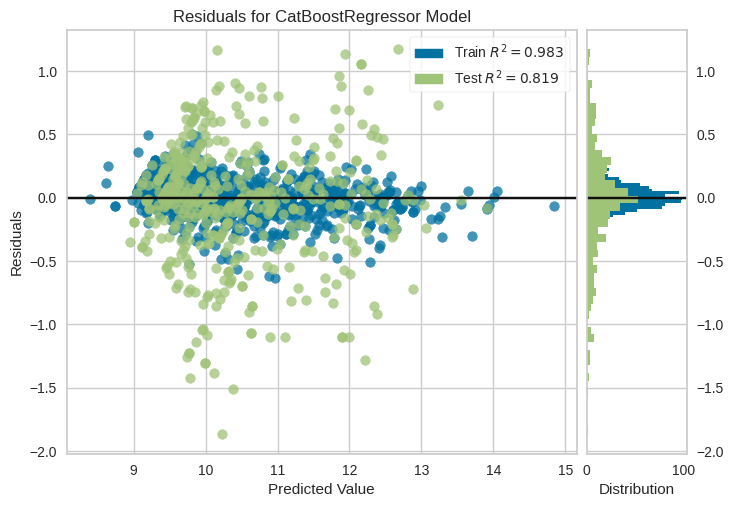

In [ ]:
# plot residuals
plot_model(best, plot = 'residuals')

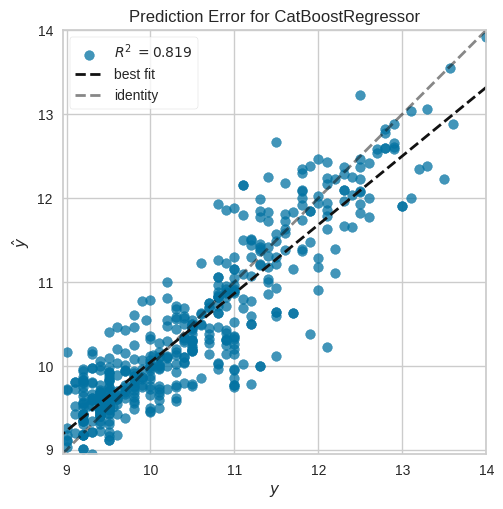

In [ ]:
# plot error
plot_model(best, plot = 'error')

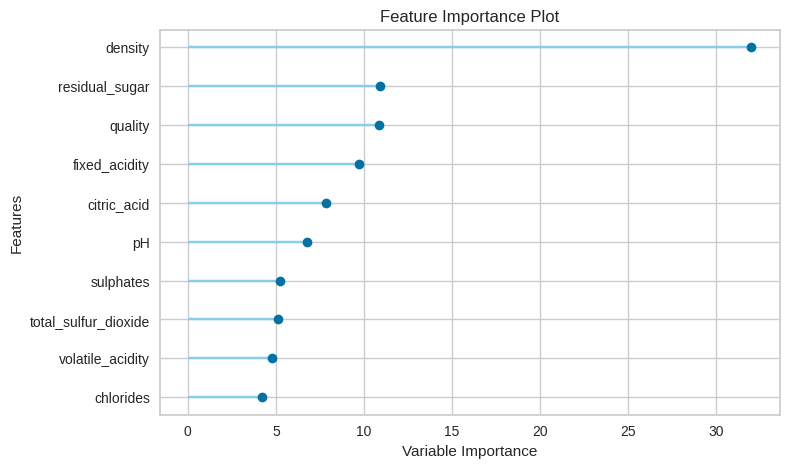

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
# check docstring to see available plots
help(plot_model)

Help on function plot_model in module pycaret.regression.functional:

plot_model(estimator, plot: str = 'residuals', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    
    Example
    --------
    >>> from pycaret.datasets import get_data
    >>> boston = get_data('boston')
    >>> from pycaret.regression import *
    >>> exp_name = setup(data = boston,  target = 'medv')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'residual')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'residual'
        List of available plots (ID - Name):
    
       

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses `ipywidget`.

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

___

## Prediction
The `predict_model` function returns `prediction_label` as new column to the input dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.3339,0.2136,0.4622,0.8188,0.0396,0.0315


In [ ]:
# show predictions df
holdout_pred.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,quality,alcohol,prediction_label
912,10.0,0.46,0.44,2.9,0.065,4.0,8.0,0.99674,3.33,0.62,6,12.2,11.395583
772,9.5,0.57,0.27,2.3,0.082,23.0,144.0,0.99782,3.27,0.55,5,9.4,9.618191
1037,7.3,0.91,0.10,1.8,0.074,20.0,56.0,0.99672,3.35,0.56,5,9.2,9.351609
1106,8.2,0.23,0.42,1.9,0.069,9.0,17.0,0.99376,3.21,0.54,6,12.3,11.963622
263,7.9,0.37,0.23,1.8,0.077,23.0,49.0,0.99630,3.28,0.67,5,9.3,9.798311


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `charges`. We can then use the new data frame without labels for scoring.

In [ ]:
# copy data and drop charges

new_data = data.copy()
new_data.drop('alcohol', axis=1, inplace=True)
new_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5


In [ ]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,quality,prediction_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,9.433343
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,9.661195
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,9.762821
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,9.898262
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,9.433343


___

## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [ ]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['fixed_acidity',
                                              'volatile_acidity', 'citric_acid',
                                              'residual_sugar', 'chlorides',
                                              'free_sulfur_dioxide',
                                              'total_sulfur_dioxide', 'density',
                                              'pH', 'sulphates', 'quality'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  <catboost.core.CatBoostRegressor object at 0x7b1524464400>)]),
 'my_first_pipeline.pkl')

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fixed_acidity',
                                             'volatile_acidity', 'citric_acid',
                                             'residual_sugar', 'chlorides',
                                             'free_sulfur_dioxide',
                                             'total_sulfur_dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x7b14ce7c7130>)])

# 👇 Detailed function-by-function overview

## ✅ Setup
The `setup` function initializes the experiment in PyCaret and creates the transformation pipeline based on all the parameters passed in the function. Setup function must be called before executing any other function. It takes two required parameters: `data` and `target`. All the other parameters are optional and are used for configuring data preprocessing pipeline.

In [ ]:
s = setup(data, target = 'alcohol', session_id = 123)

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(1599, 12)"
4,Transformed data shape,"(1599, 12)"
5,Transformed train set shape,"(1119, 12)"
6,Transformed test set shape,"(480, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use `get_config` method.

In [ ]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [ ]:
# lets access X_train_transformed
get_config('X_train_transformed')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,quality
374,14.0,0.410,0.63,3.8,0.089,6.0,47.0,1.00140,3.01,0.81,6.0
800,7.2,0.610,0.08,4.0,0.082,26.0,108.0,0.99641,3.25,0.51,5.0
1441,7.4,0.785,0.19,5.2,0.094,19.0,98.0,0.99713,3.16,0.52,6.0
1269,5.5,0.490,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,8.0
691,9.2,0.920,0.24,2.6,0.087,12.0,93.0,0.99980,3.48,0.54,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1122,6.3,0.470,0.00,1.4,0.055,27.0,33.0,0.99220,3.45,0.48,6.0
1346,6.1,0.590,0.01,2.1,0.056,5.0,13.0,0.99472,3.52,0.56,5.0
1406,8.2,0.240,0.34,5.1,0.062,8.0,22.0,0.99740,3.22,0.94,6.0
1389,6.7,0.480,0.02,2.2,0.080,36.0,111.0,0.99524,3.10,0.53,5.0


In [ ]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


All the preprocessing configurations and experiment settings/parameters are passed into the `setup` function. To see all available parameters, check the docstring:

In [ ]:
# help(setup)

In [ ]:
# init setup with normalize = True
s = setup(data, target = 'alcohol', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(1599, 12)"
4,Transformed data shape,"(1599, 12)"
5,Transformed train set shape,"(1119, 12)"
6,Transformed test set shape,"(480, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


array([[<Axes: title={'center': 'fixed_acidity'}>,
        <Axes: title={'center': 'volatile_acidity'}>,
        <Axes: title={'center': 'citric_acid'}>],
       [<Axes: title={'center': 'residual_sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free_sulfur_dioxide'}>],
       [<Axes: title={'center': 'total_sulfur_dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'quality'}>, <Axes: >]], dtype=object)

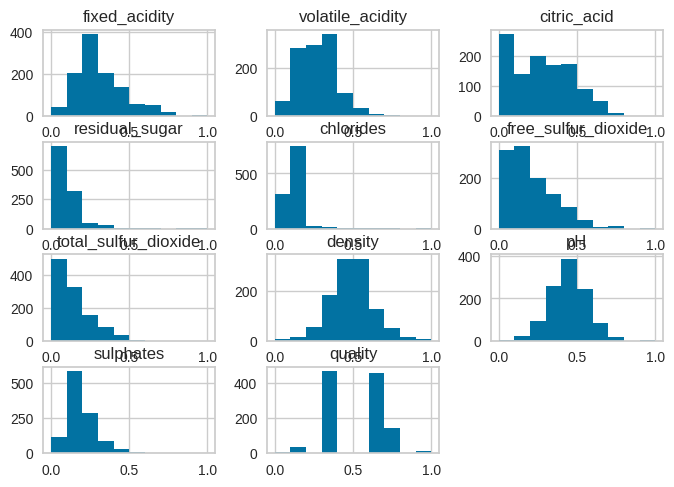

In [ ]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed').hist()

Notice that all the values are between 0 and 1 - that is because we passed `normalize=True` in the `setup` function. If you don't remember how it compares to actual data, no problem - we can also access non-transformed values using `get_config` and then compare. See below and notice the range of values on x-axis and compare it with histogram above.

array([[<Axes: title={'center': 'fixed_acidity'}>,
        <Axes: title={'center': 'volatile_acidity'}>,
        <Axes: title={'center': 'citric_acid'}>],
       [<Axes: title={'center': 'residual_sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free_sulfur_dioxide'}>],
       [<Axes: title={'center': 'total_sulfur_dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'quality'}>, <Axes: >]], dtype=object)

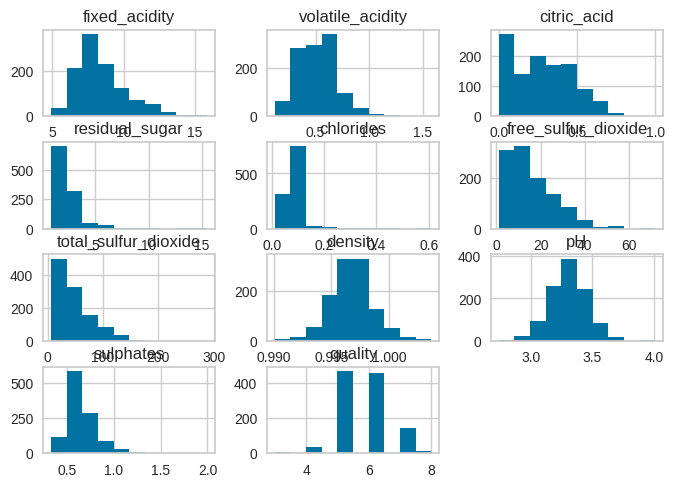

In [ ]:
get_config('X_train').hist()

___

## ✅ Compare Models
The `compare_models` function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.3321,0.2394,0.4874,0.7818,0.0415,0.0316,2.1850
lightgbm,Light Gradient Boosting Machine,0.3483,0.2672,0.5145,0.7548,0.0438,0.0331,0.2670
xgboost,Extreme Gradient Boosting,0.3435,0.2771,0.5247,0.7448,0.0447,0.0325,0.2840
et,Extra Trees Regressor,0.3444,0.2798,0.5274,0.7442,0.0449,0.0327,0.3580
gbr,Gradient Boosting Regressor,0.3992,0.2953,0.5420,0.7304,0.0464,0.0381,0.3310
rf,Random Forest Regressor,0.3766,0.2951,0.5413,0.7296,0.0462,0.0358,0.9080
br,Bayesian Ridge,0.4536,0.3610,0.5972,0.6692,0.0517,0.0434,0.0310
lr,Linear Regression,0.4532,0.3609,0.5971,0.6691,0.0517,0.0434,0.0310
lar,Least Angle Regression,0.4532,0.3609,0.5971,0.6691,0.0517,0.0434,0.0330
huber,Huber Regressor,0.4482,0.3638,0.5989,0.6668,0.0519,0.0429,0.0560


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

`compare_models` by default uses all the estimators in model library (all except models with `Turbo=False`) . To see all available models you can use the function `models()`

In [ ]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


You can use the `include` and `exclude` parameter in the `compare_models` to train only select model or exclude specific models from training by passing the model id's in `exclude` parameter.

In [ ]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbr', 'xgboost', 'lightgbm', 'catboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.3321,0.2394,0.4874,0.7818,0.0415,0.0316,2.5100
lightgbm,Light Gradient Boosting Machine,0.3483,0.2672,0.5145,0.7548,0.0438,0.0331,0.4280
xgboost,Extreme Gradient Boosting,0.3435,0.2771,0.5247,0.7448,0.0447,0.0325,0.2660
et,Extra Trees Regressor,0.3444,0.2798,0.5274,0.7442,0.0449,0.0327,0.5510
gbr,Gradient Boosting Regressor,0.3992,0.2953,0.5420,0.7304,0.0464,0.0381,0.4070
rf,Random Forest Regressor,0.3766,0.2951,0.5413,0.7296,0.0462,0.0358,0.7180
dt,Decision Tree Regressor,0.4768,0.5560,0.7433,0.4875,0.0635,0.0451,0.0670


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [ ]:
compare_tree_models

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [ ]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.3321,0.2394,0.4874,0.7818,0.0415,0.0316,2.510
lightgbm,Light Gradient Boosting Machine,0.3483,0.2672,0.5145,0.7548,0.0438,0.0331,0.428
xgboost,Extreme Gradient Boosting,0.3435,0.2771,0.5247,0.7448,0.0447,0.0325,0.266
et,Extra Trees Regressor,0.3444,0.2798,0.5274,0.7442,0.0449,0.0327,0.551
gbr,Gradient Boosting Regressor,0.3992,0.2953,0.5420,0.7304,0.0464,0.0381,0.407
rf,Random Forest Regressor,0.3766,0.2951,0.5413,0.7296,0.0462,0.0358,0.718
dt,Decision Tree Regressor,0.4768,0.5560,0.7433,0.4875,0.0635,0.0451,0.067


By default `compare_models` return the single best performing model based on the metric defined in the `sort` parameter. Let's change our code to return 3 top models based on `MAE`.

In [ ]:
best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.3321,0.2394,0.4874,0.7818,0.0415,0.0316,2.2250
xgboost,Extreme Gradient Boosting,0.3435,0.2771,0.5247,0.7448,0.0447,0.0325,0.2770
et,Extra Trees Regressor,0.3444,0.2798,0.5274,0.7442,0.0449,0.0327,0.3570
lightgbm,Light Gradient Boosting Machine,0.3483,0.2672,0.5145,0.7548,0.0438,0.0331,0.2540
rf,Random Forest Regressor,0.3766,0.2951,0.5413,0.7296,0.0462,0.0358,0.8670
gbr,Gradient Boosting Regressor,0.3992,0.2953,0.5420,0.7304,0.0464,0.0381,0.3650
huber,Huber Regressor,0.4482,0.3638,0.5989,0.6668,0.0519,0.0429,0.0560
lr,Linear Regression,0.4532,0.3609,0.5971,0.6691,0.0517,0.0434,0.0340
lar,Least Angle Regression,0.4532,0.3609,0.5971,0.6691,0.0517,0.0434,0.0340
br,Bayesian Ridge,0.4536,0.3610,0.5972,0.6692,0.0517,0.0434,0.0350


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

In [ ]:
# list of top 3 models by MAE
best_mae_models_top3

 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=123, ...),
 ExtraTreesRegressor(n_jobs=-1, random_state=123)]

Some other parameters that you might find very useful in `compare_models` are:

- fold
- cross_validation
- budget_time
- errors
- probability_threshold
- parallel

You can check the docstring of the function for more info.

In [ ]:
# help(compare_models)

## ✅ Experiment Logging
PyCaret integrates with many different type of experiment loggers (default = 'mlflow'). To turn on experiment tracking in PyCaret you can set `log_experiment` and `experiment_name` parameter. It will automatically track all the metrics, hyperparameters, and artifacts based on the defined logger.

In [ ]:
from pycaret.regression import *
s = setup(data, target = 'alcohol' , experiment_name='insurance_experiment')

,Description,Value
0,Session id,3953
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(1599, 12)"
4,Transformed data shape,"(1599, 12)"
5,Transformed train set shape,"(1119, 12)"
6,Transformed test set shape,"(480, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# compare models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.3262,0.2136,0.4603,0.8034,0.0395,0.0311,2.2020
lightgbm,Light Gradient Boosting Machine,0.3347,0.2218,0.4700,0.7954,0.0403,0.0319,0.2980
xgboost,Extreme Gradient Boosting,0.3369,0.2441,0.4922,0.7761,0.0423,0.0321,0.2340
et,Extra Trees Regressor,0.3403,0.2494,0.4979,0.7705,0.0428,0.0325,0.4420
rf,Random Forest Regressor,0.3697,0.2601,0.5079,0.7608,0.0437,0.0353,0.9310
gbr,Gradient Boosting Regressor,0.3886,0.2688,0.5176,0.7532,0.0445,0.0371,0.4520
lr,Linear Regression,0.4545,0.3501,0.5905,0.6759,0.0514,0.0436,0.0290
lar,Least Angle Regression,0.4650,0.3613,0.6002,0.6644,0.0523,0.0446,0.0250
ada,AdaBoost Regressor,0.5259,0.4099,0.6387,0.6251,0.0556,0.0509,0.1710
dt,Decision Tree Regressor,0.4785,0.5120,0.7137,0.5250,0.0614,0.0454,0.0300


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
# start mlflow server on localhost:5000
!mlflow ui

[2024-11-30 01:00:07 +0000] [14545] [INFO] Starting gunicorn 23.0.0
[2024-11-30 01:00:07 +0000] [14545] [INFO] Listening at: http://127.0.0.1:5000 (14545)
[2024-11-30 01:00:07 +0000] [14545] [INFO] Using worker: sync
[2024-11-30 01:00:07 +0000] [14546] [INFO] Booting worker with pid: 14546
[2024-11-30 01:00:07 +0000] [14547] [INFO] Booting worker with pid: 14547
[2024-11-30 01:00:07 +0000] [14548] [INFO] Booting worker with pid: 14548
[2024-11-30 01:00:07 +0000] [14549] [INFO] Booting worker with pid: 14549
[2024-11-30 01:01:29 +0000] [14545] [INFO] Handling signal: int

Aborted!
[2024-11-30 01:01:29 +0000] [14546] [INFO] Worker exiting (pid: 14546)
[2024-11-30 01:01:29 +0000] [14547] [INFO] Worker exiting (pid: 14547)
[2024-11-30 01:01:29 +0000] [14549] [INFO] Worker exiting (pid: 14549)
[2024-11-30 01:01:29 +0000] [14548] [INFO] Worker exiting (pid: 14548)
[2024-11-30 01:01:30 +0000] [14545] [INFO] Shutting down: Master


By default PyCaret uses `MLFlow` logger that can be changed using `log_experiment` parameter. Following loggers are available:
    
    - mlflow
    - wandb
    - comet_ml
    - dagshub
    
Other logging related parameters that you may find useful are:

- experiment_custom_tags
- log_plots
- log_data
- log_profile

For more information check out the docstring of the `setup` function.

In [ ]:
# help(setup)

## ✅ Create Model
The `create_model` function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function. All the available models can be accessed using the `models` function.

In [ ]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
# train linear regression with default fold=10
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4841,0.4013,0.6335,0.6664,0.0545,0.0465
1,0.4760,0.3722,0.6101,0.7330,0.0524,0.0454
2,0.4444,0.3417,0.5846,0.6942,0.0506,0.0424
3,0.4286,0.2927,0.5410,0.7543,0.0468,0.0409
4,0.4161,0.2886,0.5372,0.7363,0.0465,0.0392
5,0.4512,0.3387,0.5820,0.6891,0.0502,0.0422
6,0.4812,0.3831,0.6189,0.5701,0.0545,0.0471
7,0.4824,0.4162,0.6452,0.5623,0.0572,0.0469
8,0.4238,0.2917,0.5401,0.6974,0.0484,0.0415


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [ ]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4841,0.4013,0.6335,0.6664,0.0545,0.0465
1,0.4760,0.3722,0.6101,0.7330,0.0524,0.0454
2,0.4444,0.3417,0.5846,0.6942,0.0506,0.0424
3,0.4286,0.2927,0.5410,0.7543,0.0468,0.0409
4,0.4161,0.2886,0.5372,0.7363,0.0465,0.0392
5,0.4512,0.3387,0.5820,0.6891,0.0502,0.0422
6,0.4812,0.3831,0.6189,0.5701,0.0545,0.0471
7,0.4824,0.4162,0.6452,0.5623,0.0572,0.0469
8,0.4238,0.2917,0.5401,0.6974,0.0484,0.0415


In [ ]:
# train linear regression with fold=3
lr = create_model('lr', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4742,0.3739,0.6115,0.6931,0.0528,0.0454
1,0.4408,0.3208,0.5664,0.7089,0.0491,0.0418
2,0.4697,0.3866,0.6218,0.6114,0.0549,0.0456
Mean,0.4616,0.3604,0.5999,0.6711,0.0523,0.0443
Std,0.0148,0.0285,0.0241,0.0427,0.0024,0.0018


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# train linear regression with specific model parameters
create_model('lr', fit_intercept = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6993,0.7456,0.8635,0.3802,0.0741,0.0665
1,0.7597,0.8884,0.9426,0.3625,0.0798,0.0720
2,0.6747,0.7606,0.8721,0.3193,0.0737,0.0634
3,0.7317,0.7646,0.8744,0.3582,0.0747,0.0692
4,0.7072,0.7497,0.8659,0.3149,0.0743,0.0664
5,0.6632,0.7599,0.8717,0.3025,0.0733,0.0607
6,0.5882,0.5804,0.7618,0.3487,0.0658,0.0567
7,0.6239,0.5841,0.7643,0.3858,0.0671,0.0608
8,0.6525,0.7143,0.8451,0.2592,0.0724,0.0631


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(fit_intercept=False, n_jobs=-1)

In [ ]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(n_jobs=-1)

Some other parameters that you might find very useful in `create_model` are:

- cross_validation
- engine
- fit_kwargs
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(create_model)

## ✅ Tune Model

The `tune_model` function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# train a dt model with default params
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4973,0.5094,0.7137,0.5766,0.0615,0.0470
1,0.4351,0.4327,0.6578,0.6895,0.0567,0.0415
2,0.5223,0.5738,0.7575,0.4864,0.0649,0.0496
3,0.4254,0.4350,0.6595,0.6349,0.0570,0.0404
4,0.5009,0.5658,0.7522,0.4830,0.0640,0.0469
5,0.5186,0.6026,0.7763,0.4469,0.0664,0.0488
6,0.4942,0.5370,0.7328,0.3974,0.0633,0.0471
7,0.5269,0.5695,0.7546,0.4011,0.0658,0.0505
8,0.3887,0.3733,0.6110,0.6128,0.0524,0.0369


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5184,0.4726,0.6874,0.6072,0.0582,0.0484
1,0.4766,0.3993,0.6319,0.7135,0.0543,0.0454
2,0.5416,0.5011,0.7079,0.5515,0.0607,0.0517
3,0.4132,0.3003,0.5480,0.7480,0.0471,0.0391
4,0.5474,0.5131,0.7163,0.5311,0.0616,0.0518
5,0.5307,0.4913,0.7009,0.5490,0.0595,0.0496
6,0.4843,0.4234,0.6507,0.5249,0.0564,0.0463
7,0.5001,0.4265,0.6531,0.5515,0.0574,0.0484
8,0.4455,0.3844,0.6200,0.6013,0.0538,0.0425


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Metric to optimize can be defined in `optimize` parameter (default = 'Accuracy'). Also, a custom tuned grid can be passed with `custom_grid` parameter.

In [ ]:
dt

DecisionTreeRegressor(random_state=3953)

In [ ]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = MAE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4973,0.5094,0.7137,0.5766,0.0615,0.0470
1,0.4351,0.4327,0.6578,0.6895,0.0567,0.0415
2,0.5223,0.5738,0.7575,0.4864,0.0649,0.0496
3,0.4254,0.4350,0.6595,0.6349,0.0570,0.0404
4,0.5009,0.5658,0.7522,0.4830,0.0640,0.0469
5,0.5186,0.6026,0.7763,0.4469,0.0664,0.0488
6,0.4942,0.5370,0.7328,0.3974,0.0633,0.0471
7,0.5269,0.5695,0.7546,0.4011,0.0658,0.0505
8,0.3887,0.3733,0.6110,0.6128,0.0524,0.0369


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5184,0.4726,0.6874,0.6072,0.0582,0.0484
1,0.4766,0.3993,0.6319,0.7135,0.0543,0.0454
2,0.5416,0.5011,0.7079,0.5515,0.0607,0.0517
3,0.4132,0.3003,0.5480,0.7480,0.0471,0.0391
4,0.5474,0.5131,0.7163,0.5311,0.0616,0.0518
5,0.5307,0.4913,0.7009,0.5490,0.0595,0.0496
6,0.4843,0.4234,0.6507,0.5249,0.0564,0.0463
7,0.5001,0.4265,0.6531,0.5515,0.0574,0.0484
8,0.4455,0.3844,0.6200,0.6013,0.0538,0.0425


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
# model object
tuned_dt

DecisionTreeRegressor(criterion='friedman_mse', max_depth=11, max_features=1.0,
                      min_impurity_decrease=0.01, min_samples_leaf=6,
                      min_samples_split=10, random_state=3953)

In [ ]:
# tuner object
tuner

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['fixed_acidity',
                                                                          'volatile_acidity',
                                                                          'citric_acid',
                                                                          'residual_sugar',
                                                                          'chlorides',
                                                                          'free_sulfur_dioxide',
                                                                          'total_sulfur_dioxide',
                                                                          'density',
                                                                          'pH',
                                                                          'sulphates',
                                                                          'quality'],
                                                                 transformer=...
                                                                        7, 8, 9,
                                                                        10, 11,
                                                                        12, 13,
                                                                        14, 15,
                                                                        16],
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                 

The default search algorithm is `RandomizedSearchCV` from `sklearn`. This can be changed by using `search_library` and `search_algorithm` parameter.

In [ ]:
# tune dt using optuna
tuned_dt = tune_model(dt, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5769,0.6105,0.7814,0.4925,0.0657,0.0537
1,0.4125,0.3037,0.5511,0.7821,0.0473,0.0393
2,0.5285,0.4826,0.6947,0.5680,0.0597,0.0503
3,0.4899,0.4390,0.6626,0.6315,0.0566,0.0468
4,0.4987,0.4816,0.6940,0.5599,0.0605,0.0479
5,0.5187,0.4557,0.6750,0.5817,0.0582,0.0486
6,0.5356,0.5034,0.7095,0.4351,0.0612,0.0520
7,0.5117,0.4619,0.6796,0.5143,0.0595,0.0496
8,0.4197,0.3085,0.5554,0.6800,0.0481,0.0403


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:optuna_integration.sklearn.sklearn:Searching the best hyperparameters using 1119 samples...
INFO:optuna_integration.sklearn.sklearn:Finished hyperparameter search!


For more details on all available `search_library` and `search_algorithm` please check the docstring. Some other parameters that you might find very useful in `tune_model` are:

- choose_better
- n_iter
- early_stopping
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(tune_model)

## ✅ Ensemble Model

The `ensemble_model` function ensembles a given estimator. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4063,0.3647,0.6039,0.6969,0.0503,0.0377
1,0.4005,0.3023,0.5498,0.7831,0.0481,0.0388
2,0.4157,0.3213,0.5668,0.7124,0.0483,0.0393
3,0.3843,0.2626,0.5124,0.7796,0.0445,0.0370
4,0.4041,0.2972,0.5452,0.7284,0.0476,0.0387
5,0.3762,0.2678,0.5175,0.7542,0.0432,0.0350
6,0.4567,0.3519,0.5932,0.6051,0.0517,0.0443
7,0.3893,0.3047,0.5520,0.6796,0.0484,0.0375
8,0.3011,0.1986,0.4457,0.7940,0.0389,0.0290


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=3953),
                 random_state=3953)

In [ ]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4268,0.4054,0.6367,0.6631,0.0534,0.0396
1,0.3619,0.2868,0.5355,0.7942,0.0467,0.0350
2,0.3494,0.3098,0.5566,0.7227,0.0473,0.0334
3,0.3496,0.2790,0.5282,0.7658,0.0453,0.0330
4,0.3598,0.2593,0.5092,0.7630,0.0442,0.0341
5,0.3266,0.2540,0.5040,0.7668,0.0422,0.0299
6,0.3446,0.2817,0.5308,0.6838,0.0463,0.0335
7,0.4147,0.3895,0.6241,0.5904,0.0534,0.0394
8,0.2687,0.1974,0.4443,0.7953,0.0385,0.0257


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=3953),
                  n_estimators=10, random_state=3953)

Some other parameters that you might find very useful in `ensemble_model` are:

- choose_better
- n_estimators
- groups
- fit_kwargs
- return_train_score

You can check the docstring of the function for more info.

In [ ]:
# help(ensemble_model)

## ✅ Blend Models

The `blend_models` function trains a `VotingRegressor` for select models passed in the `estimator_list` parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# top 3 models based on mae
best_mae_models_top3

 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=123, ...),
 ExtraTreesRegressor(n_jobs=-1, random_state=123)]

In [ ]:
# blend top 3 models
blend_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3616,0.2882,0.5368,0.7605,0.0447,0.0336
1,0.3295,0.2264,0.4758,0.8376,0.0407,0.0314
2,0.3385,0.2240,0.4733,0.7995,0.0402,0.0320
3,0.2983,0.1915,0.4376,0.8392,0.0381,0.0289
4,0.3021,0.1814,0.4259,0.8342,0.0372,0.0288
5,0.2879,0.1696,0.4118,0.8443,0.0346,0.0268
6,0.3234,0.2083,0.4564,0.7662,0.0402,0.0315
7,0.3459,0.2353,0.4851,0.7526,0.0425,0.0334
8,0.2677,0.1683,0.4102,0.8255,0.0355,0.0257


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingRegressor(estimators=[('CatBoost Regressor',
                             <catboost.core.CatBoostRegressor object at 0x7b14ba93bc70>),
                            ('Extreme Gradient Boosting',
                             XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device='cpu',
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature...
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=-1,
                                          num_parallel_tree=None,
                                          random_state=123, ...)),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=123))],
                n_jobs=-1)

Some other parameters that you might find very useful in `blend_models` are:

- choose_better
- weights
- optimize
- fit_kwargs
- return_train_score

You can check the docstring of the function for more info.

In [ ]:
# help(blend_models)

## ✅ Stack Models

The `stack_models` function trains a meta-model over select estimators passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# stack models
stack_models(best_mae_models_top3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:06:11
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Stacking Regressor


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

KeyboardInterrupt: 

Some other parameters that you might find very useful in `stack_models` are:

- choose_better
- meta_model
- restack
- optimize
- return_train_score

You can check the docstring of the function for more info.

In [ ]:
# help(stack_models)

## ✅ Plot Model

The `plot_model` function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.

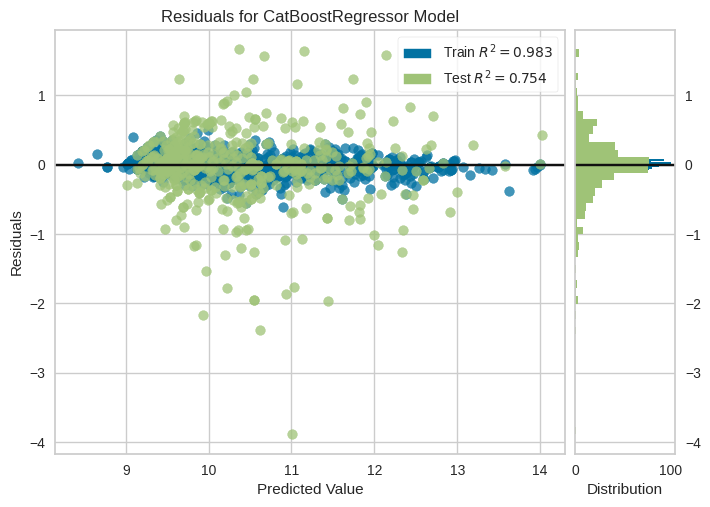

In [ ]:
# plot residuals
plot_model(best, plot = 'residuals')

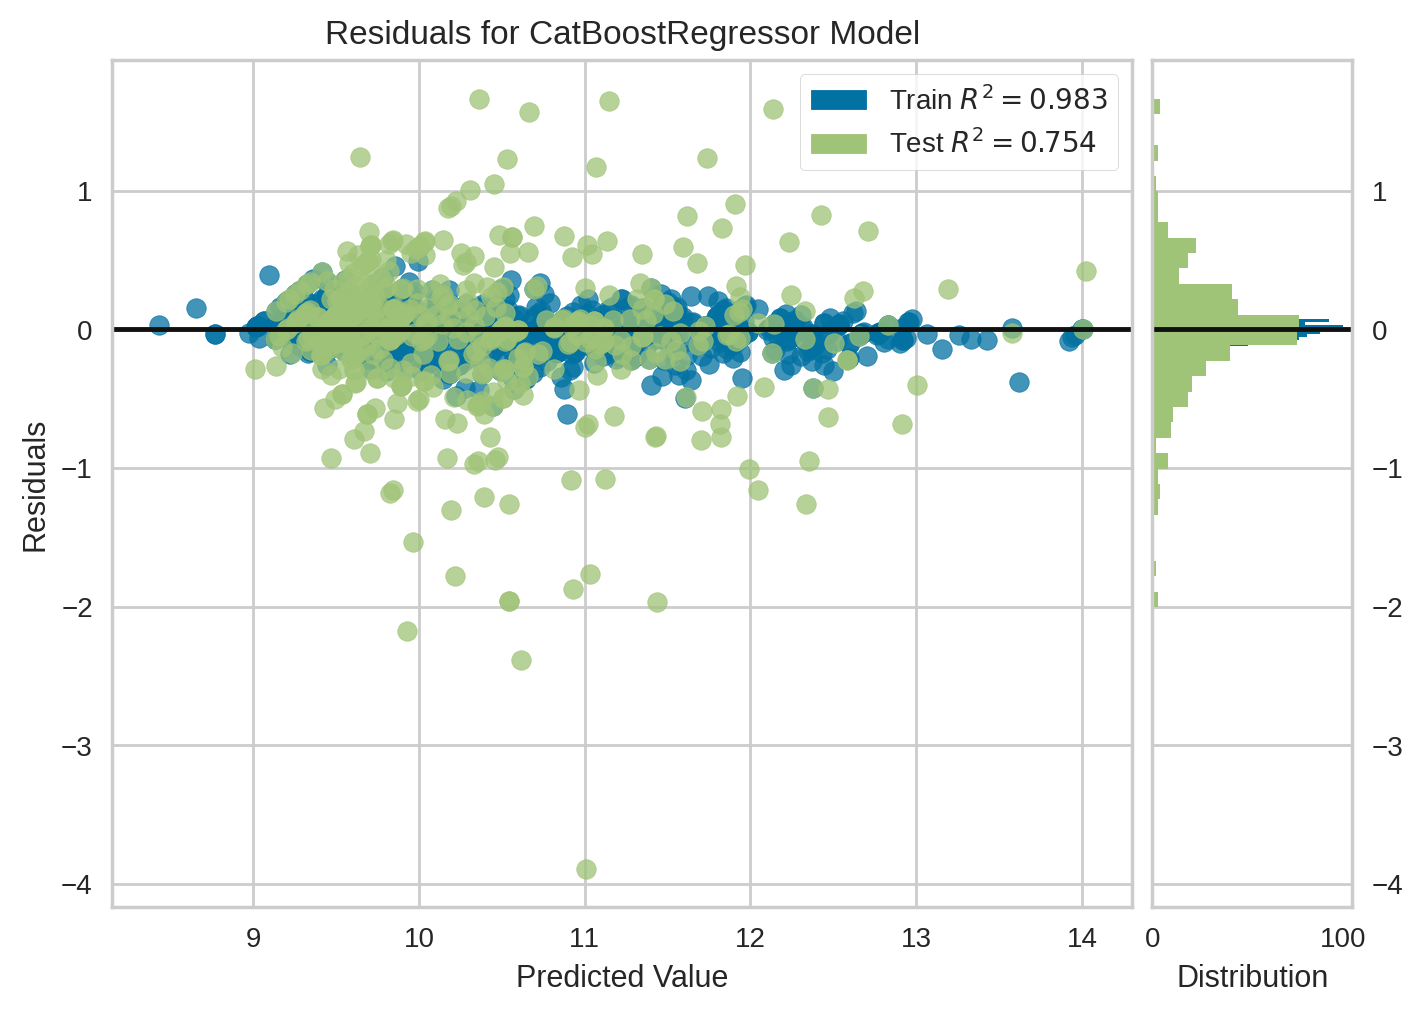

In [ ]:
# to control the scale of plot
plot_model(best, plot = 'residuals', scale = 2)

In [ ]:
# to save the plot
plot_model(best, plot = 'residuals', save=True)

'Residuals.png'

Some other parameters that you might find very useful in `plot_model` are:

- fit_kwargs
- plot_kwargs
- groups
- display_format

You can check the docstring of the function for more info.

In [ ]:
# help(plot_model)

## ✅ Interpret Model

The `interpret_model` function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations). For more info on this, please see https://shap.readthedocs.io/en/latest/

In [ ]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3604,0.2586,0.5085,0.7850,0.0421,0.0334
1,0.3434,0.2314,0.4811,0.8339,0.0412,0.0327
2,0.3521,0.2263,0.4757,0.7975,0.0404,0.0334
3,0.3305,0.2175,0.4664,0.8174,0.0396,0.0316
4,0.3125,0.1843,0.4293,0.8316,0.0375,0.0297
5,0.3251,0.1913,0.4374,0.8244,0.0372,0.0304
6,0.3620,0.2490,0.4990,0.7206,0.0436,0.0352
7,0.3519,0.2280,0.4774,0.7603,0.0419,0.0340
8,0.2819,0.1751,0.4184,0.8184,0.0362,0.0271


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

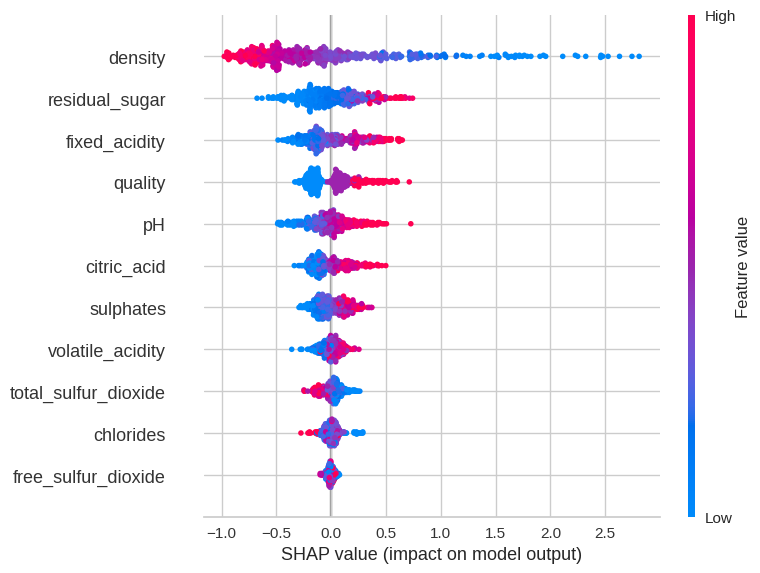

In [ ]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [ ]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

Some other parameters that you might find very useful in `interpret_model` are:

- plot
- feature
- use_train_data
- X_new_sample
- y_new_sample
- save

You can check the docstring of the function for more info.

In [ ]:
# help(interpret_model)

## ✅ Get Leaderboard

This function returns the leaderboard of all models trained in the current setup.

In [ ]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/38 [00:00<?, ?it/s]

,Model Name,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
Index,,,,,,,,
0,Linear Regression,"(TransformerWrapper(include=['fixed_acidity', ...",0.4545,0.3501,0.5905,0.6759,0.0514,0.0436
1,Lasso Regression,"(TransformerWrapper(include=['fixed_acidity', ...",0.8445,1.0815,1.0375,0.0159,0.0883,0.0798
2,Ridge Regression,"(TransformerWrapper(include=['fixed_acidity', ...",0.6783,0.7360,0.8562,0.3289,0.0732,0.0644
3,Elastic Net,"(TransformerWrapper(include=['fixed_acidity', ...",0.8421,1.0817,1.0376,0.0159,0.0883,0.0796
4,Least Angle Regression,"(TransformerWrapper(include=['fixed_acidity', ...",0.4650,0.3613,0.6002,0.6644,0.0523,0.0446
5,Lasso Least Angle Regression,"(TransformerWrapper(include=['fixed_acidity', ...",0.8445,1.0815,1.0375,0.0159,0.0883,0.0798
6,Orthogonal Matching Pursuit,"(TransformerWrapper(include=['fixed_acidity', ...",0.8399,1.0810,1.0371,0.0166,0.0883,0.0794
7,Bayesian Ridge,"(TransformerWrapper(include=['fixed_acidity', ...",0.6756,0.7300,0.8528,0.3341,0.0729,0.0641
8,Passive Aggressive Regressor,"(TransformerWrapper(include=['fixed_acidity', ...",1.0405,1.7677,1.2944,-0.6017,0.1119,0.1016


In [ ]:
# select the best model based on MAE
lb.sort_values(by='MAE', ascending=True)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fixed_acidity',
                                             'volatile_acidity', 'citric_acid',
                                             'residual_sugar', 'chlorides',
                                             'free_sulfur_dioxide',
                                             'total_sulfur_dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=...
                                                           max_bin=None,
                                                           max_cat_threshold=None,
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=None,
                                                           max_leaves=None,
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=None,
                                                           n_jobs=-1,
                                                           num_parallel_tree=None,
                                                           random_state=123, ...)),
                                             ('Extra Trees Regressor',
                                              ExtraTreesRegressor(n_jobs=-1,
                                                                  random_state=123))],
                                 n_jobs=-1)]])

Some other parameters that you might find very useful in `get_leaderboard` are:

- finalize_models
- fit_kwargs
- model_only
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(get_leaderboard)

## ✅ AutoML
This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the `get_metrics` function.

In [ ]:
# find best model based on CV metrics
automl()

## ✅ Dashboard
The dashboard function generates the interactive dashboard for a trained model. The dashboard is implemented using `ExplainerDashboard`. For more information check out [Explainer Dashboard.](explainerdashboard.readthedocs.io)

In [ ]:
# dashboard function
dashboard(dt, display_format ='inline')

Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard inline (terminate it with ExplainerDashboard.terminate(8050))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ✅Create App
This function creates a basic gradio app for inference.

In [ ]:
# create gradio app
create_app(best)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6783bb5627e5ed8be0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## ✅ Create API
This function takes an input model and creates a POST API for inference.

In [ ]:
# create api
create_api(best, api_name = 'my_first_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_first_api.py


In [ ]:
!python my_first_api.py

Transformation Pipeline and Model Successfully Loaded
Traceback (most recent call last):
  File "/content/my_first_api.py", line 16, in <module>
    input_model = create_model("my_first_api_input", **{'fixed_acidity': 9.800000190734863, 'volatile_acidity': 0.5, 'citric_acid': 0.3400000035762787, 'residual_sugar': 2.299999952316284, 'chlorides': 0.09399999678134918, 'free_sulfur_dioxide': 10.0, 'total_sulfur_dioxide': 45.0, 'density': 0.9986400008201599, 'pH': 3.240000009536743, 'sulphates': 0.6000000238418579, 'quality': 7.0})
  File "/usr/local/lib/python3.10/dist-packages/pydantic/main.py", line 1600, in create_model
    return meta(
  File "/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_model_construction.py", line 115, in __new__
    private_attributes = inspect_namespace(
  File "/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_model_construction.py", line 428, in inspect_namespace
    raise PydanticUserError(
pydantic.errors.PydanticUserError: A non-annota

In [ ]:
# check out the .py file created with this magic command
%load my_first_api.py

## ✅ Create Docker
This function creates a `Dockerfile` and `requirements.txt` for productionalizing API end-point.

In [ ]:
create_docker('my_first_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [ ]:
# check out the DockerFile file created with this magic command
%load Dockerfile

In [ ]:
# check out the requirements file created with this magic command
%load requirements.txt

## ✅ Finalize Model
This function trains a given model on the entire dataset including the hold-out set.

In [ ]:
final_best = finalize_model(best)

In [ ]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fixed_acidity',
                                             'volatile_acidity', 'citric_acid',
                                             'residual_sugar', 'chlorides',
                                             'free_sulfur_dioxide',
                                             'total_sulfur_dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('actual_estimator',
                 <catboost.core.CatBoostRegressor object at 0x7b13f88fbeb0>)])

## ✅ Convert Model
This function transpiles the trained machine learning model's decision function in different programming languages such as Python, C, Java, Go, C#, etc. It is very useful if you want to deploy models into environments where you can't install your normal Python stack to support model inference.

In [ ]:
# transpiles learned function to java
print(convert_model(dt, language = 'java'))

public class Model {
    public static double score(double[] input) {
        double var0;
        if (input[7] <= 0.9954450130462646) {
            if (input[7] <= 0.9939300119876862) {
                if (input[0] <= 5.8500001430511475) {
                    if (input[7] <= 0.9919599890708923) {
                        if (input[8] <= 3.6100000143051147) {
                            if (input[4] <= 0.04600000008940697) {
                                var0 = 14.0;
                            } else {
                                if (input[4] <= 0.05550000071525574) {
                                    var0 = 13.566666603088379;
                                } else {
                                    var0 = 13.5;
                                }
                            }
                        } else {
                            var0 = 14.0;
                        }
                    } else {
                        if (input[1] <= 0.882500022649765) {
            

## ✅ Deploy Model
This function deploys the entire ML pipeline on the cloud.

**AWS:**  When deploying model on AWS S3, environment variables must be configured using the command-line interface. To configure AWS environment variables, type `aws configure` in terminal. The following information is required which can be generated using the Identity and Access Management (IAM) portal of your amazon console account:

- AWS Access Key ID
- AWS Secret Key Access
- Default Region Name (can be seen under Global settings on your AWS console)
- Default output format (must be left blank)

**GCP:** To deploy a model on Google Cloud Platform ('gcp'), the project must be created using the command-line or GCP console. Once the project is created, you must create a service account and download the service account key as a JSON file to set environment variables in your local environment. Learn more about it: https://cloud.google.com/docs/authentication/production

**Azure:** To deploy a model on Microsoft Azure ('azure'), environment variables for the connection string must be set in your local environment. Go to settings of storage account on Azure portal to access the connection string required.
AZURE_STORAGE_CONNECTION_STRING (required as environment variable)
Learn more about it: https://docs.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python?toc=%2Fpython%2Fazure%2FTOC.json

In [ ]:
# deploy model on aws s3
deploy_model(best, model_name = 'my_first_platform_on_aws',
             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

ValueError: Boto3 credentials not configured. Refer boto3 documentation (https://boto3.amazonaws.com/v1/documentation/api/latest/guide/credentials.html)

In [ ]:
# load model from aws s3
# loaded_from_aws = load_model(model_name = 'my_first_platform_on_aws', platform = 'aws',
#                              authentication = {'bucket' : 'pycaret-test'})

# loaded_from_aws

## ✅ Save / Load Model
This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

In [ ]:
# save model
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['fixed_acidity',
                                              'volatile_acidity', 'citric_acid',
                                              'residual_sugar', 'chlorides',
                                              'free_sulfur_dioxide',
                                              'total_sulfur_dioxide', 'density',
                                              'pH', 'sulphates', 'quality'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  <catboost.core.CatBoostRegressor object at 0x7b149e349f90>)]),
 'my_first_model.pkl')

In [ ]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fixed_acidity',
                                             'volatile_acidity', 'citric_acid',
                                             'residual_sugar', 'chlorides',
                                             'free_sulfur_dioxide',
                                             'total_sulfur_dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x7b13f15b6560>)])

## ✅ Save / Load Experiment
This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup function.

In [ ]:
# save experiment
save_experiment('my_experiment')

In [ ]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,Session id,4246
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(1599, 12)"
4,Transformed data shape,"(1599, 12)"
5,Transformed train set shape,"(1119, 12)"
6,Transformed test set shape,"(480, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple
